<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/85_C_DOE_DOS_FACTORES2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.graphics.factorplots import interaction_plot
#!pip install bioinfokit
#from bioinfokit.analys import stat
!pip install pingouin
import pingouin as pg

#  **Tema 7: Diseño Factorial -Dos Factores 2usando Python**

##  **Ejemplo de un Diseño Factorial $2\bigotimes3$. Una empresa de materiales de construcción quiere estudiar la influencia que tienen el grosor y el tipo de templado sobre la resistencia máxima de unas láminas de acero. Para ello miden el estrés hasta la rotura (variable cuantitativa dependiente) para dos tipos de templado (lento y rápido) y tres grosores de lámina (8mm, 16mm y 24 mm).**

|B: templado \ A: grosor|	8	|16	|24	|
|:--:|:--:|:--:|:--:|
|rapido	|15.29, 15.89, 16.02, 16.56, 15.46|	16.91, 16.99, 17.27, 16.85, 16.35|	17.23, 17.81, 17.74, 18.02, 18.37|
|lento	|12.07, 12.42, 12.73, 13.02, 12.05|	12.92, 13.01, 12.21, 13.49, 14.01|	13.30, 12.82, 12.49, 13.55, 14.53|



## **7.1 Los Datos del Problema**

In [ ]:
resistencia = [15.29, 15.89, 16.02, 16.56, 15.46, 16.91, 16.99, 17.27, 16.85,
               16.35, 17.23, 17.81, 17.74, 18.02, 18.37, 12.07, 12.42, 12.73,
               13.02, 12.05, 12.92, 13.01, 12.21, 13.49, 14.01, 13.30, 12.82,
               12.49, 13.55, 14.53]

templado = ["rapido"] * 15 + ["lento"] * 15

grosor = ([8] * 5 + [16] * 5 + [24] * 5) * 2


## **7.2 Construyamos el dataFrame de los Datos**

In [ ]:
## **7.2 Construyamos el dataFrame de los Datos**
datos = pd.DataFrame({
    'templado': templado,
    'grosor': grosor,
    'resistencia': resistencia
})



## **7.3 Veamos el DataFrame**
### **a. DataFrame**

In [ ]:
datos.head()

,templado,grosor,resistencia
0,rapido,8,15.29
1,rapido,8,15.89
2,rapido,8,16.02
3,rapido,8,16.56
4,rapido,8,15.46


### **b. Media y desviación estandard por Factores**

In [ ]:
### **b. Media y desviación estandard por Factores**
print('Resistencia media y desviación típica por templado')
datos.groupby('templado')['resistencia'].agg(['mean', 'std'])

Resistencia media y desviación típica por templado


,mean,std
templado,,
lento,12.974667,0.711345
rapido,16.850667,0.927643


In [ ]:
print('Resistencia media y desviación típica por grosor')
datos.groupby('grosor')['resistencia'].agg(['mean', 'std'])

Resistencia media y desviación típica por grosor


,mean,std
grosor,,
8,14.151,1.836993
16,15.001,2.036797
24,15.586,2.442354


# **c. Media y desviación estandard por combinación de Factores**

In [ ]:
# **c. Media y desviación estandard por combinación de Factores**
print('Resistencia media y desviación típica por templado y grosor')
datos.groupby(['templado', 'grosor'])['resistencia'].agg(['mean', 'std'])

Resistencia media y desviación típica por templado y grosor


mean       std
templado grosor                  
lento    8       12.458  0.420797
         16      13.128  0.672473
         24      13.338  0.783371
rapido   8       15.844  0.500030
         16      16.874  0.334186
         24      17.834  0.417169

## **7.4. BoxPlot para el Diseño**

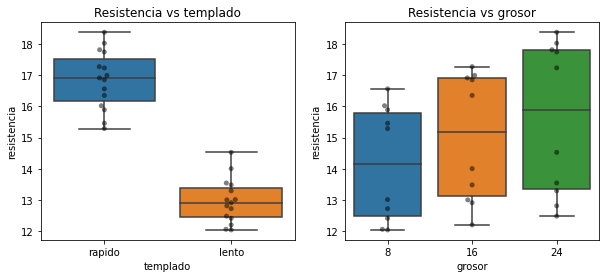

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title('Resistencia vs templado')
sns.boxplot(x="templado", y="resistencia", data=datos, ax=axs[0])
sns.swarmplot(x="templado", y="resistencia", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Resistencia vs grosor')
sns.boxplot(x="grosor", y="resistencia", data=datos, ax=axs[1])
sns.swarmplot(x="grosor", y="resistencia", data=datos, color='black',
              alpha = 0.5, ax=axs[1]);

## **7.5 Diagrama Bivariado esposible dado que  hay replicas**

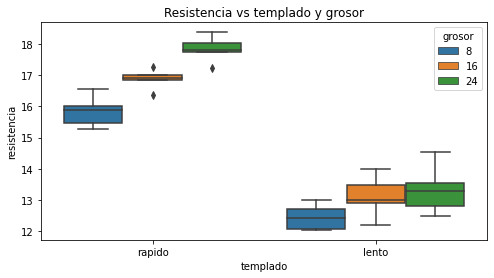

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Resistencia vs templado y grosor')
sns.boxplot(x="templado", y="resistencia", hue='grosor', data=datos, ax=ax);

## **7.6 Análisis de Varianza Tipo II**

In [ ]:
# **a. Análisis de Varianza2**
modelodatos = smf.ols("resistencia ~ C(templado) + C(grosor)+C(templado) * C(grosor)", data = datos).fit()
print(modelodatos.summary())

                            OLS Regression Results                            
Dep. Variable:            resistencia   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     84.12
Date:                Wed, 10 May 2023   Prob (F-statistic):           2.06e-14
Time:                        13:32:53   Log-Likelihood:                -20.983
No. Observations:                  30   AIC:                             53.97
Df Residuals:                      24   BIC:                             62.37
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
# **b Análisis de Varianza Tipo II**
modelodatos = ols("resistencia ~ C(templado) + C(grosor)+C(templado) * C(grosor)", data = datos).fit()
anova_result = sm.stats.anova_lm(modelodatos, typ=2)
print (anova_result)

                           sum_sq    df           F        PR(>F)
C(templado)            112.675320   1.0  380.082037  3.194915e-16
C(grosor)               10.413167   2.0   17.563108  2.000663e-05
C(templado):C(grosor)    1.603500   2.0    2.704503  8.725105e-02
Residual                 7.114800  24.0         NaN           NaN


In [ ]:
anova_result.T

,C(templado),C(grosor),C(templado):C(grosor),Residual
sum_sq,1.126753e+02,10.413167,1.603500,7.1148
df,1.000000e+00,2.000000,2.000000,24.0000
F,3.800820e+02,17.563108,2.704503,NaN
PR(>F),3.194915e-16,0.000020,0.087251,NaN


In [ ]:
# **c. Anova 2**
pg.anova(
    data     = datos,
    dv       = 'resistencia',
    between  = ['templado', 'grosor'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,templado,112.6753,1,112.6753,380.0820,0.0000,0.9406
1,grosor,10.4132,2,5.2066,17.5631,0.0000,0.5941
2,templado * grosor,1.6035,2,0.8018,2.7045,0.0873,0.1839
3,Residual,7.1148,24,0.2964,NaN,NaN,NaN


# **7.7 Gráfico de interacciones**

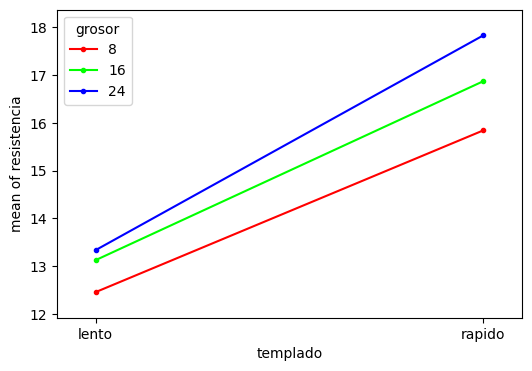

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.templado,
    trace    = datos.grosor,
    response = datos.resistencia,
    ax       = ax,
)

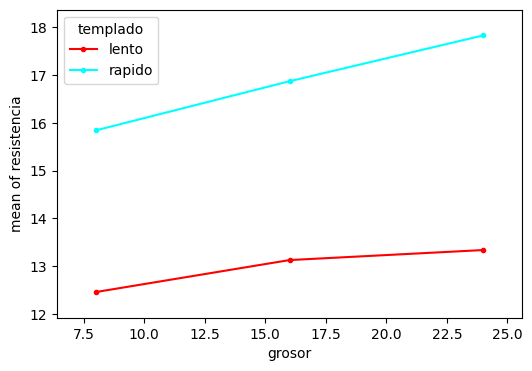

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.grosor,
    trace    = datos.templado,
    response = datos.resistencia,
    ax       = ax,
)

## **7.8 Comparaciones Múltiples - HSD TUKEY**
### **a. Comparaciones Múltiples: resistencia vs grosor**

group1,group2,meandiff,p-adj,lower,upper,reject
8,16,0.85,0.6472,-1.5012,3.2012,False
8,24,1.435,0.3007,-0.9162,3.7862,False
16,24,0.585,0.8122,-1.7662,2.9362,False


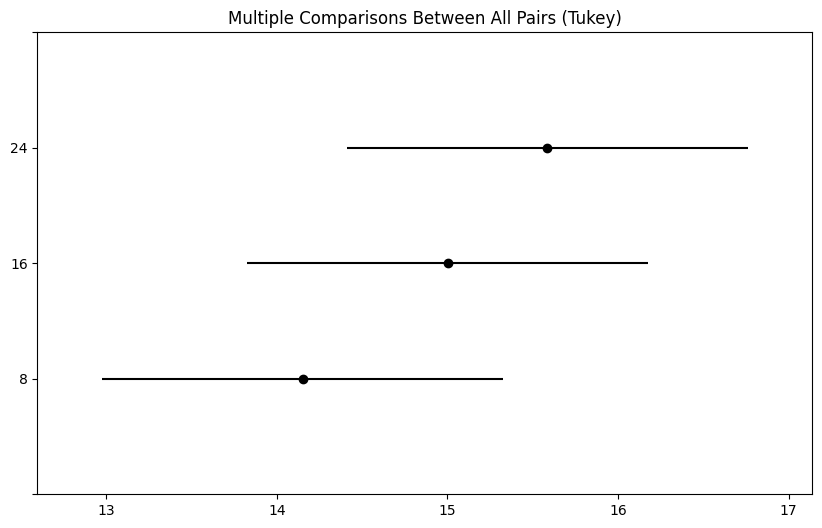

In [ ]:
### **a. Comparaciones Múltiples: resistencia vs grosor**
tukey = pairwise_tukeyhsd(endog=datos["resistencia"],     # Data
                          groups=datos["grosor"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **b. Comparaciones Múltiples: resistencia vs templado**

group1,group2,meandiff,p-adj,lower,upper,reject
lento,rapido,3.876,0.0,3.2577,4.4943,True


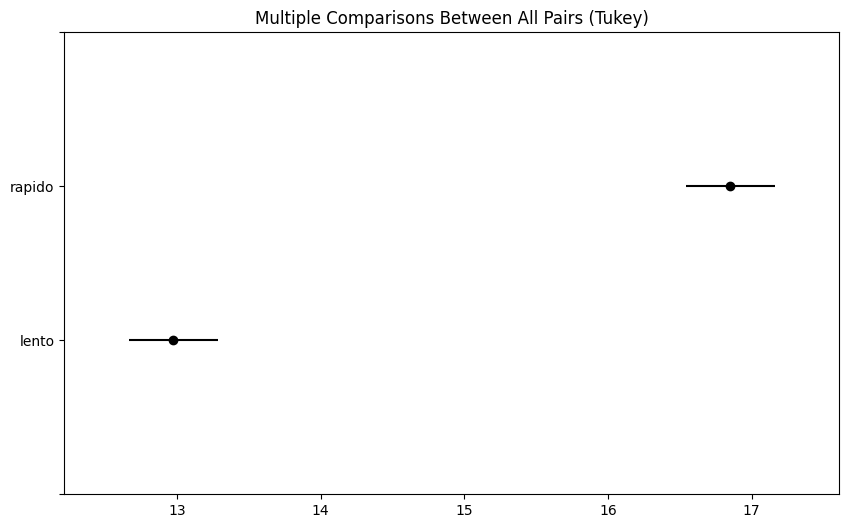

In [ ]:
### **b. Comparaciones Múltiples: resistencia vs templado**
tukey = pairwise_tukeyhsd(endog=datos["resistencia"],     # Data
                          groups=datos["templado"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **7.9 Supuestos del Modelo**
## **a. Normalidad con Shapiro Wilks**

In [ ]:
# **a. Forma 1. Shapiro Wilks**
w, pvalue =stats.shapiro(modelodatos.resid)
print('El estadístico de prueba es w = ',w,'y su valor p =', pvalue, 'mayor que 5%')

El estadístico de prueba es w =  0.9839748740196228 y su valor p = 0.9184765219688416 mayor que 5%


## **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

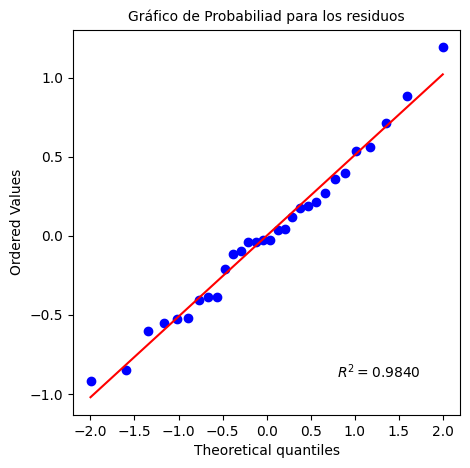

In [ ]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modelodatos.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

## **c. Histograma + curva normal teórica**

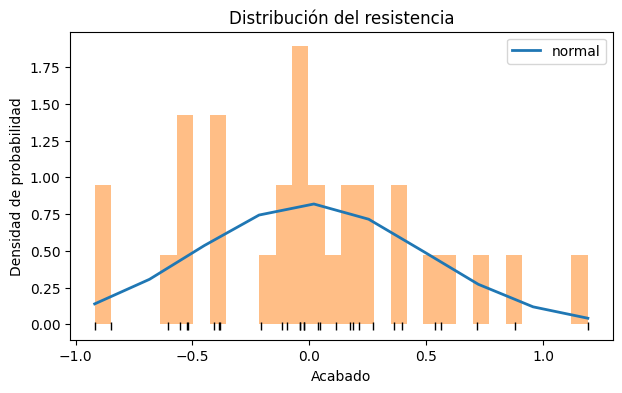

In [ ]:
## **c. Histograma + curva normal teórica**
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
tgp2 = modelodatos.resid
mu, sigma = stats.norm.fit(tgp2)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(tgp2), max(tgp2), num=10)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=tgp2, density=True, bins=30,  alpha=0.5)
ax.plot(tgp2, np.full_like(tgp2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del resistencia')
ax.set_xlabel('Acabado')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

## **d. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [ ]:
# d. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(datos['resistencia'][datos['grosor'] == 8],
             datos['resistencia'][datos['grosor'] == 16],
             datos['resistencia'][datos['grosor'] == 24])

LeveneResult(statistic=2.608187254284176, pvalue=0.09212464679791055)

In [ ]:
# d. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(datos['resistencia'][datos['templado'] == 'rapido'],
             datos['resistencia'][datos['templado'] == 'lento'])

LeveneResult(statistic=1.154493394680198, pvalue=0.29178296841553625)